## Requeriments:
To use this notebook, you need to install the libs listed above:

```$ pip3 install pandas```    
```$ pip3 install datetime```  
```$ pip3 install display```  

# 1. Ingesting the data

The original file is a csv using "," as a delimitor of columns

In [608]:
def import_file(p_file):
    file_path = p_file
    
    with open(file_path, "r") as file:
        file_treated = [x.strip() for x in file.readlines()]
        file_read = [x.split(",") for x in file_treated]
    
    return file_read

In [609]:
def create_df_upon_csv_file(p_content):

    #create the dataframe using the list
    df = pd.DataFrame(p_content)

    # grab the first row and define as header
    header = df.iloc[0]

    # consider the data, but the first row as data
    df = df[1:]
    df.columns = header

    return df

In [610]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from datetime import datetime, date

Define and import the file

In [611]:
file = "ml_project1_data.csv"
list_data = import_file(file)

Replace de blank data by NaN

In [612]:
df_original = create_df_upon_csv_file(list_data)
df_original = df_original.replace("", np.nan)

In [613]:
display(df_original.head(3))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
2,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
3,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0


## 2. Data Description

### 2.1 Shape of data

Rows and Columns

In [614]:
df_original.shape

(2240, 29)

Type of data

In [615]:
df_original.dtypes

0
ID                     object
Year_Birth             object
Education              object
Marital_Status         object
Income                 object
Kidhome                object
Teenhome               object
Dt_Customer            object
Recency                object
MntWines               object
MntFruits              object
MntMeatProducts        object
MntFishProducts        object
MntSweetProducts       object
MntGoldProds           object
NumDealsPurchases      object
NumWebPurchases        object
NumCatalogPurchases    object
NumStorePurchases      object
NumWebVisitsMonth      object
AcceptedCmp3           object
AcceptedCmp4           object
AcceptedCmp5           object
AcceptedCmp1           object
AcceptedCmp2           object
Complain               object
Z_CostContact          object
Z_Revenue              object
Response               object
dtype: object

### 2.2 Variables, Types and quantity of data

Cast the numeric and datetime data, and check the types again

In [616]:
df_original["Income"] = df_original["Income"].astype(float)
df_original["Kidhome"] = df_original["Kidhome"].astype(float)
df_original["Teenhome"] = df_original["Teenhome"].astype(float)
df_original["MntWines"] = df_original["MntWines"].astype(float)
df_original["MntFruits"] = df_original["MntFruits"].astype(float)
df_original["MntMeatProducts"] = df_original["MntMeatProducts"].astype(float)
df_original["MntFishProducts"] = df_original["MntFishProducts"].astype(float)
df_original["MntGoldProds"] = df_original["MntGoldProds"].astype(float)
df_original["NumDealsPurchases"] = df_original["NumDealsPurchases"].astype(float)
df_original["NumWebPurchases"] = df_original["NumWebPurchases"].astype(float)
df_original["NumCatalogPurchases"] = df_original["NumCatalogPurchases"].astype(float)
df_original["NumStorePurchases"] = df_original["NumStorePurchases"].astype(float)
df_original["NumWebVisitsMonth"] = df_original["NumWebVisitsMonth"].astype(float)
df_original["Dt_Customer"] = df_original["Dt_Customer"].astype("datetime64")
df_original["Year_Birth"] = df_original["Year_Birth"].astype("float")
df_original["Recency"] = df_original["Recency"].astype("float")
df_original["Response"] = df_original["Response"].astype("float")

df_original.dtypes

0
ID                             object
Year_Birth                    float64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                       float64
Teenhome                      float64
Dt_Customer            datetime64[ns]
Recency                       float64
MntWines                      float64
MntFruits                     float64
MntMeatProducts               float64
MntFishProducts               float64
MntSweetProducts               object
MntGoldProds                  float64
NumDealsPurchases             float64
NumWebPurchases               float64
NumCatalogPurchases           float64
NumStorePurchases             float64
NumWebVisitsMonth             float64
AcceptedCmp3                   object
AcceptedCmp4                   object
AcceptedCmp5                   object
AcceptedCmp1                   object
AcceptedCmp2                   object
Complain                       object
Z_CostCont

List the dataset's info as total quantity of data, qty of data by variable and their data-type

In [617]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 1 to 2240
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   object        
 1   Year_Birth           2240 non-null   float64       
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   float64       
 6   Teenhome             2240 non-null   float64       
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   float64       
 9   MntWines             2240 non-null   float64       
 10  MntFruits            2240 non-null   float64       
 11  MntMeatProducts      2240 non-null   float64       
 12  MntFishProducts      2240 non-null   float64       
 13  MntSweetProducts     2240 non-nul

### 2.3 Describe the data statistical

In [618]:
df_original.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240,2240,2240,2240,2240,2240,2240,2240,2240.000000
unique,2240,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,2,2,2,2,2,2,1,1,NaN
top,10379,NaN,Graduation,Married,NaN,NaN,NaN,2012-08-31 00:00:00,NaN,NaN,...,NaN,0,0,0,0,0,0,3,11,NaN
freq,1,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,2077,2073,2077,2096,2210,2219,2240,2240,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-07-30 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-29 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.149107
std,NaN,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.356274
min,NaN,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### 2.4 Check the missings
All columns are analysed, counting the rows and null rows.

In [619]:
def count_missings(df):
    list_missings = []
    for col in df.columns.tolist():
        column = col
        count = df[col].count()
        count_missing = df[col].isnull().sum()
        if count_missing != 0:
            list_missings.append(column)
        print(f'{column} : {count}  =>  Nulls: {count_missing}')
    return(list_missings)

In [620]:
result_missing = count_missings(df_original)
print("\nVariables: quantity of data -> nulls:\n",result_missing)

ID : 2240  =>  Nulls: 0
Year_Birth : 2240  =>  Nulls: 0
Education : 2240  =>  Nulls: 0
Marital_Status : 2240  =>  Nulls: 0
Income : 2216  =>  Nulls: 24
Kidhome : 2240  =>  Nulls: 0
Teenhome : 2240  =>  Nulls: 0
Dt_Customer : 2240  =>  Nulls: 0
Recency : 2240  =>  Nulls: 0
MntWines : 2240  =>  Nulls: 0
MntFruits : 2240  =>  Nulls: 0
MntMeatProducts : 2240  =>  Nulls: 0
MntFishProducts : 2240  =>  Nulls: 0
MntSweetProducts : 2240  =>  Nulls: 0
MntGoldProds : 2240  =>  Nulls: 0
NumDealsPurchases : 2240  =>  Nulls: 0
NumWebPurchases : 2240  =>  Nulls: 0
NumCatalogPurchases : 2240  =>  Nulls: 0
NumStorePurchases : 2240  =>  Nulls: 0
NumWebVisitsMonth : 2240  =>  Nulls: 0
AcceptedCmp3 : 2240  =>  Nulls: 0
AcceptedCmp4 : 2240  =>  Nulls: 0
AcceptedCmp5 : 2240  =>  Nulls: 0
AcceptedCmp1 : 2240  =>  Nulls: 0
AcceptedCmp2 : 2240  =>  Nulls: 0
Complain : 2240  =>  Nulls: 0
Z_CostContact : 2240  =>  Nulls: 0
Z_Revenue : 2240  =>  Nulls: 0
Response : 2240  =>  Nulls: 0

Variables: quantity of data 

Check the data with Income null

In [621]:
df_original[df_original.Income.isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
11,1994,1983.0,Graduation,Married,NaN,1.0,0.0,2013-11-15,11.0,5.0,...,7.0,0,0,0,0,0,0,3,11,0.0
28,5255,1986.0,Graduation,Single,NaN,1.0,0.0,2013-02-20,19.0,5.0,...,1.0,0,0,0,0,0,0,3,11,0.0
44,7281,1959.0,PhD,Single,NaN,0.0,0.0,2013-11-05,80.0,81.0,...,2.0,0,0,0,0,0,0,3,11,0.0
49,7244,1951.0,Graduation,Single,NaN,2.0,1.0,2014-01-01,96.0,48.0,...,6.0,0,0,0,0,0,0,3,11,0.0
59,8557,1982.0,Graduation,Single,NaN,1.0,0.0,2013-06-17,57.0,11.0,...,6.0,0,0,0,0,0,0,3,11,0.0
72,10629,1973.0,2n Cycle,Married,NaN,1.0,0.0,2012-09-14,25.0,25.0,...,8.0,0,0,0,0,0,0,3,11,0.0
91,8996,1957.0,PhD,Married,NaN,2.0,1.0,2012-11-19,4.0,230.0,...,9.0,0,0,0,0,0,0,3,11,0.0
92,9235,1957.0,Graduation,Single,NaN,1.0,1.0,2014-05-27,45.0,7.0,...,7.0,0,0,0,0,0,0,3,11,0.0
93,5798,1973.0,Master,Together,NaN,0.0,0.0,2013-11-23,87.0,445.0,...,1.0,0,0,0,0,0,0,3,11,0.0
129,8268,1961.0,PhD,Married,NaN,0.0,1.0,2013-07-11,23.0,352.0,...,6.0,0,0,0,0,0,0,3,11,0.0


## 3. Select Data

In [622]:
df_dataset = df_original

In [623]:
display(df_dataset.head(3))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1,5524,1957.0,Graduation,Single,58138.0,0.0,0.0,2012-09-04,58.0,635.0,...,7.0,0,0,0,0,0,0,3,11,1.0
2,2174,1954.0,Graduation,Single,46344.0,1.0,1.0,2014-03-08,38.0,11.0,...,5.0,0,0,0,0,0,0,3,11,0.0
3,4141,1965.0,Graduation,Together,71613.0,0.0,0.0,2013-08-21,26.0,426.0,...,4.0,0,0,0,0,0,0,3,11,0.0


## 4. Data Cleaning

### 4.1 Check Duplicated data

Check if exists more than one account by user: There no one case.

In [624]:
df_count_by_userid = df_dataset.groupby("ID")["ID"].nunique()

In [625]:
display(df_count_by_userid[df_count_by_userid.values > 1].head(5))

Series([], Name: ID, dtype: int64)

Check the Income average to treat the null data

In [626]:
df_dataset.groupby('ID').Income.apply(set).apply(sum).describe(percentiles = [0.1,0.25,0.5,0.75,0.9,0.99])

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
10%       24117.500000
25%       35303.000000
50%       51381.500000
75%       68522.000000
90%       79844.000000
99%       94458.800000
max      666666.000000
Name: Income, dtype: float64

In [627]:
def replace_missings(df):
    for col in df:
        if col in ["Income"]:
            df[col] = df[col].fillna(pd.to_numeric(df_dataset[col], errors='coerce').mean()).astype(float)
    return df

In [628]:
df_dataset_treated = replace_missings(df_dataset)

In [629]:
display(df_dataset_treated.head(3))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1,5524,1957.0,Graduation,Single,58138.0,0.0,0.0,2012-09-04,58.0,635.0,...,7.0,0,0,0,0,0,0,3,11,1.0
2,2174,1954.0,Graduation,Single,46344.0,1.0,1.0,2014-03-08,38.0,11.0,...,5.0,0,0,0,0,0,0,3,11,0.0
3,4141,1965.0,Graduation,Together,71613.0,0.0,0.0,2013-08-21,26.0,426.0,...,4.0,0,0,0,0,0,0,3,11,0.0


In [630]:
result_missing = count_missings(df_original)
print("\nVariables: quantity of data -> nulls:\n",result_missing)

ID : 2240  =>  Nulls: 0
Year_Birth : 2240  =>  Nulls: 0
Education : 2240  =>  Nulls: 0
Marital_Status : 2240  =>  Nulls: 0
Income : 2240  =>  Nulls: 0
Kidhome : 2240  =>  Nulls: 0
Teenhome : 2240  =>  Nulls: 0
Dt_Customer : 2240  =>  Nulls: 0
Recency : 2240  =>  Nulls: 0
MntWines : 2240  =>  Nulls: 0
MntFruits : 2240  =>  Nulls: 0
MntMeatProducts : 2240  =>  Nulls: 0
MntFishProducts : 2240  =>  Nulls: 0
MntSweetProducts : 2240  =>  Nulls: 0
MntGoldProds : 2240  =>  Nulls: 0
NumDealsPurchases : 2240  =>  Nulls: 0
NumWebPurchases : 2240  =>  Nulls: 0
NumCatalogPurchases : 2240  =>  Nulls: 0
NumStorePurchases : 2240  =>  Nulls: 0
NumWebVisitsMonth : 2240  =>  Nulls: 0
AcceptedCmp3 : 2240  =>  Nulls: 0
AcceptedCmp4 : 2240  =>  Nulls: 0
AcceptedCmp5 : 2240  =>  Nulls: 0
AcceptedCmp1 : 2240  =>  Nulls: 0
AcceptedCmp2 : 2240  =>  Nulls: 0
Complain : 2240  =>  Nulls: 0
Z_CostContact : 2240  =>  Nulls: 0
Z_Revenue : 2240  =>  Nulls: 0
Response : 2240  =>  Nulls: 0

Variables: quantity of data -

Creating a new dataset with new columns

In [631]:
df_dataset_treated = df_dataset

In [632]:
df_dataset_treated["Current_Year"] = date.today().strftime("%Y")
df_dataset_treated["Year_customer"] = pd.to_datetime(df_dataset_treated["Dt_Customer"]).dt.year

In [633]:
df_dataset_treated["Current_Year"] = df_dataset_treated["Current_Year"].astype(float)
df_dataset_treated["Year_customer"] = df_dataset_treated["Year_customer"].astype(float)

In [634]:
display(df_dataset_treated.head(3))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Current_Year,Year_customer
1,5524,1957.0,Graduation,Single,58138.0,0.0,0.0,2012-09-04,58.0,635.0,...,0,0,0,0,0,3,11,1.0,2021.0,2012.0
2,2174,1954.0,Graduation,Single,46344.0,1.0,1.0,2014-03-08,38.0,11.0,...,0,0,0,0,0,3,11,0.0,2021.0,2014.0
3,4141,1965.0,Graduation,Together,71613.0,0.0,0.0,2013-08-21,26.0,426.0,...,0,0,0,0,0,3,11,0.0,2021.0,2013.0


### 4.2 Create the age group

In [635]:
def define_age_group(row):
    if row["Age"] < 25:
        return "1"
    elif row["Age"] >= 25 and row["Age"] <= 35:
        return "2"
    elif row["Age"] > 35 and row["Age"] <= 45:
        return "3"
    elif row["Age"] > 45 and row["Age"] <= 55:
        return "4"
    elif row["Age"] > 55 and row["Age"] <= 65:
        return "5"
    elif row["Age"] > 65:
        return "6"
    else:
        return "6"
    
def define_age_group_description(row):
    if row["Age"] < 25:
        return "1. Less than 25"
    elif row["Age"] >= 25 and row["Age"] <= 35:
        return "2. Between 25 and 35"
    elif row["Age"] > 35 and row["Age"] <= 45:
        return "3. Between 36 and 45"
    elif row["Age"] > 45 and row["Age"] <= 55:
        return "4. Between 46 and 55"
    elif row["Age"] > 55 and row["Age"] <= 65:
        return "5. Between 56 and 65"
    elif row["Age"] > 65:
        return "6. More than 65"
    else:
        return "5. No Information"

In [636]:
def define_years_customer_group(row):
    if row["years_as_customer"] < 1:
        return "1"
    elif row["years_as_customer"] >= 2 and row["years_as_customer"] <= 3:
        return "2"
    elif row["years_as_customer"] > 3 and row["years_as_customer"] <= 5:
        return "3"
    elif row["years_as_customer"] > 5 and row["years_as_customer"] <= 7:
        return "4"
    elif row["years_as_customer"] > 7 and row["years_as_customer"] <= 9:
        return "5"
    elif row["Age"] > 9:
        return "6"
    else:
        return "7"
    
def define_years_customer_group_description(row):
    if row["Age"] < 1:
        return "1. Less than 1 year"
    elif row["years_as_customer"] >= 2 and row["years_as_customer"] <= 3:
        return "2. Between 2 and 3 years"
    elif row["years_as_customer"] > 3 and row["years_as_customer"] <= 5:
        return "3. Between 3 and 5 years"
    elif row["years_as_customer"] > 5 and row["years_as_customer"] <= 7:
        return "4. Between 5 and 7 years"
    elif row["years_as_customer"] > 7 and row["years_as_customer"] <= 9:
        return "5. Between 7 and 9 years"
    elif row["Age"] > 9:
        return "6. More than 9 years"
    else:
        return "7. No Information"

In [637]:
def define_id_marital_status(row):
    if row["Marital_Status"] == "Single":
        return 1
    elif row["Marital_Status"] == "Married":
        return 2
    elif row["Marital_Status"] == "Together":
        return 3
    elif row["Marital_Status"] == "Divorced":
        return 4
    elif row["Marital_Status"] == "Absurd":
        return 5
    elif row["Marital_Status"] == "Widow":
        return 6
    elif row["Marital_Status"] == "Alone":
        return 7
    elif row["Marital_Status"] == "YOLO":
        return 8
    else:
        return -1
    
def define_id_education_status(row):
    if row["Education"] == "PhD":
        return 1
    elif row["Education"] == "Master":
        return 2
    elif row["Education"] == "Graduation":
        return 3
    elif row["Education"] == "Basic":
        return 4
    elif row["Education"] == "2n Cycle":
        return 5
    else:
        return -1

In [638]:
#define the current age
df_dataset_treated["Age"] = df_dataset_treated["Current_Year"] - df_dataset_treated["Year_Birth"]
df_dataset_treated["age_group"] = df_dataset_treated.apply(define_age_group, axis=1)
df_dataset_treated["age_group_description"] = df_dataset_treated.apply(define_age_group_description, axis=1)

#define the qty of years as customer
df_dataset_treated["years_as_customer"] = df_dataset_treated["Current_Year"] - df_dataset_treated["Year_customer"]
df_dataset_treated["Year_customer_group"] = df_dataset_treated.apply(define_years_customer_group, axis=1)
df_dataset_treated["Year_customer_group_desc"] = df_dataset_treated.apply(define_years_customer_group_description, axis=1)

#define the months as customer and the income by month
df_dataset_treated["months_as_customer"] = df_dataset_treated["years_as_customer"] * 12
df_dataset_treated["Income_Month"] = df_dataset_treated["Income"] / df_dataset_treated["months_as_customer"]

#define the months as customer and the income by month
df_dataset_treated["marital_status_id"] = df_dataset_treated.apply(define_id_marital_status, axis=1)
df_dataset_treated["education_id"] = df_dataset_treated.apply(define_id_education_status, axis=1)


In [639]:
display(df_dataset_treated.head(3))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Age,age_group,age_group_description,years_as_customer,Year_customer_group,Year_customer_group_desc,months_as_customer,Income_Month,marital_status_id,education_id
1,5524,1957.0,Graduation,Single,58138.0,0.0,0.0,2012-09-04,58.0,635.0,...,64.0,5,5. Between 56 and 65,9.0,5,5. Between 7 and 9 years,108.0,538.314815,1,3
2,2174,1954.0,Graduation,Single,46344.0,1.0,1.0,2014-03-08,38.0,11.0,...,67.0,6,6. More than 65,7.0,4,4. Between 5 and 7 years,84.0,551.714286,1,3
3,4141,1965.0,Graduation,Together,71613.0,0.0,0.0,2013-08-21,26.0,426.0,...,56.0,5,5. Between 56 and 65,8.0,5,5. Between 7 and 9 years,96.0,745.968750,3,3


## Age box-plot

Text(0.5, 1.0, 'Age')

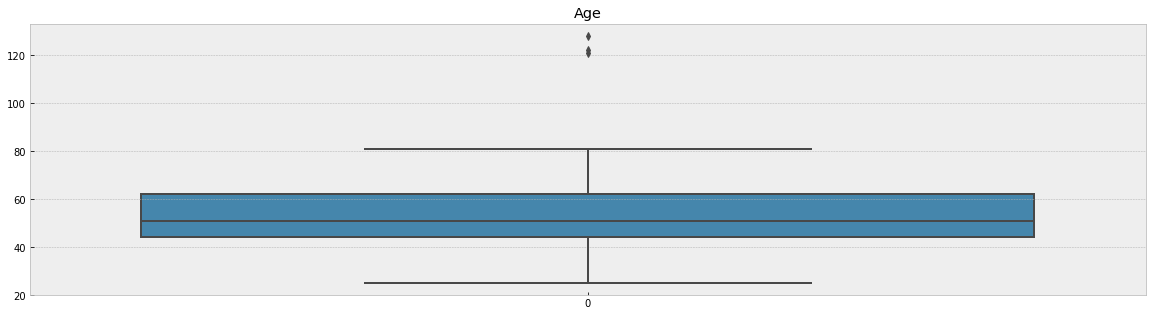

In [640]:
import seaborn as sns

age = df_dataset_treated.Age
sns.boxplot(data=[age]).set_title("Age")

# Referencia: https://stackoverflow.com/questions/52536052/python-side-by-side-matplotlib-boxplots-with-colors

In [641]:
df_dataset_treated.groupby('ID').Age.apply(set).apply(sum).describe(percentiles = [0.1,0.25,0.5,0.75,0.9,0.99])

count    2240.000000
mean       52.194196
std        11.984069
min        25.000000
10%        37.000000
25%        44.000000
50%        51.000000
75%        62.000000
90%        69.000000
99%        76.000000
max       128.000000
Name: Age, dtype: float64

### 4.2 Describe variables after the treatments

In [642]:
df_dataset_treated.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Age,age_group,age_group_description,years_as_customer,Year_customer_group,Year_customer_group_desc,months_as_customer,Income_Month,marital_status_id,education_id
count,2240,2240.000000,2240,2240,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240,2240,2240.000000,2240,2240,2240.000000,2240.000000,2240.000000,2240.000000
unique,2240,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,5,5,NaN,2,2,NaN,NaN,NaN,NaN
top,10379,NaN,Graduation,Married,NaN,NaN,NaN,2012-08-31 00:00:00,NaN,NaN,...,NaN,4,4. Between 46 and 55,NaN,5,5. Between 7 and 9 years,NaN,NaN,NaN,NaN
freq,1,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,685,685,NaN,1683,1683,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-07-30 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-29 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,52.194196,NaN,NaN,7.971875,NaN,NaN,95.662500,550.730036,2.404018,2.606250
std,NaN,11.984069,NaN,NaN,25037.797168,0.538398,0.544538,NaN,28.962453,336.597393,...,11.984069,NaN,NaN,0.684554,NaN,NaN,8.214652,269.327594,1.161263,1.124797
min,NaN,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,25.000000,NaN,NaN,7.000000,NaN,NaN,84.000000,20.595238,1.000000,1.000000
25%,NaN,1959.000000,NaN,NaN,35538.750000,0.000000,0.000000,NaN,24.000000,23.750000,...,44.000000,NaN,NaN,8.000000,NaN,NaN,96.000000,372.820312,2.000000,2.000000


## 5. Data Exploration

In [643]:
def create_bar_graph(df, vargroupby, varcount, varreplace, xlabel, ylabel, title):
    df_produtos = df.groupby([vargroupby])[varcount].count()
    df_produtos = pd.DataFrame(df_produtos).rename(columns = {varcount:varreplace})
    
    # Create a bar graph with qty of readers by book
    # Define the size
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [20,5]
    plt.rcParams['font.size'] = 10
    #plt.figure(figsize=(10,5), dpi=100)
    #figsize=(40,5)
    df_produtos.sort_values([varreplace], ascending=False).plot(kind="bar", fontsize=12, legend=True, label=df_produtos[varreplace].tolist())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, fontsize=15)
    plt.show()

### 5.1  Exploration of customer's characteristics

In [644]:
df_customers = df_dataset_treated.groupby(["Education", "age_group_description"])["ID"].count()
df_customers = pd.DataFrame(df_customers).rename(columns = {'ID':'qty_customers'})
display(df_customers)

qty_customers
Education  age_group_description               
2n Cycle   2. Between 25 and 35              24
           3. Between 36 and 45              68
           4. Between 46 and 55              51
           5. Between 56 and 65              41
           6. More than 65                   19
Basic      2. Between 25 and 35              17
           3. Between 36 and 45              18
           4. Between 46 and 55              10
           5. Between 56 and 65               6
           6. More than 65                    3
Graduation 2. Between 25 and 35             105
           3. Between 36 and 45             274
           4. Between 46 and 55             342
           5. Between 56 and 65             238
           6. More than 65                  168
Master     2. Between 25 and 35              21
           3. Between 36 and 45              69
           4. Between 46 and 55             118
           5. Between 56 and 65              91
           6. More than 65                   71
PhD        2. Between 25 and 35              22
           3. Between 36 and 45              77
           4. Between 46 and 55             164
           5. Between 56 and 65             116
           6. More than 65                  107

In [645]:
df_customers = df_dataset_treated.groupby(["Marital_Status", "age_group_description"])["ID"].count()
df_customers = pd.DataFrame(df_customers).rename(columns = {'ID':'qty_customers'})
display(df_customers)

qty_customers
Marital_Status age_group_description               
Absurd         2. Between 25 and 35               1
               5. Between 56 and 65               1
Alone          2. Between 25 and 35               1
               4. Between 46 and 55               1
               5. Between 56 and 65               1
Divorced       2. Between 25 and 35               8
               3. Between 36 and 45              38
               4. Between 46 and 55              85
               5. Between 56 and 65              59
               6. More than 65                   42
Married        2. Between 25 and 35              68
               3. Between 36 and 45             209
               4. Between 46 and 55             282
               5. Between 56 and 65             176
               6. More than 65                  129
Single         2. Between 25 and 35              77
               3. Between 36 and 45             115
               4. Between 46 and 55             132
               5. Between 56 and 65              95
               6. More than 65                   61
Together       2. Between 25 and 35              34
               3. Between 36 and 45             143
               4. Between 46 and 55             163
               5. Between 56 and 65             137
               6. More than 65                  103
Widow          3. Between 36 and 45               1
               4. Between 46 and 55              20
               5. Between 56 and 65              23
               6. More than 65                   33
YOLO           4. Between 46 and 55               2

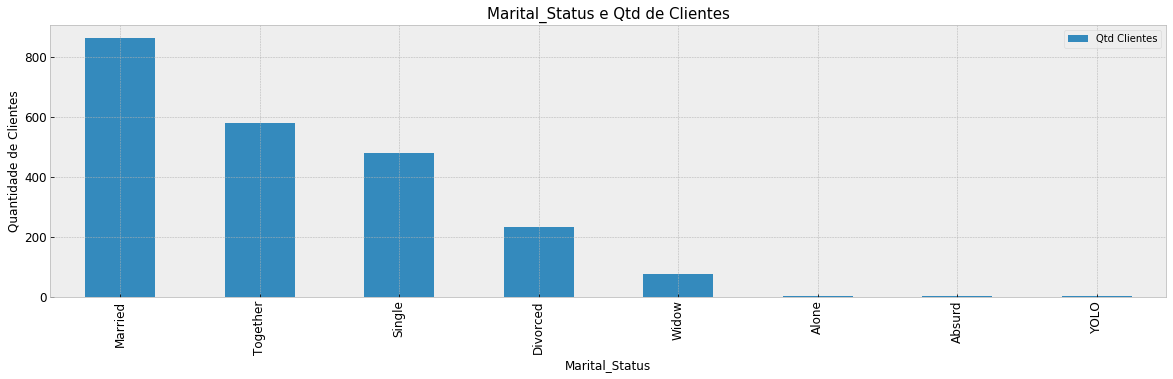

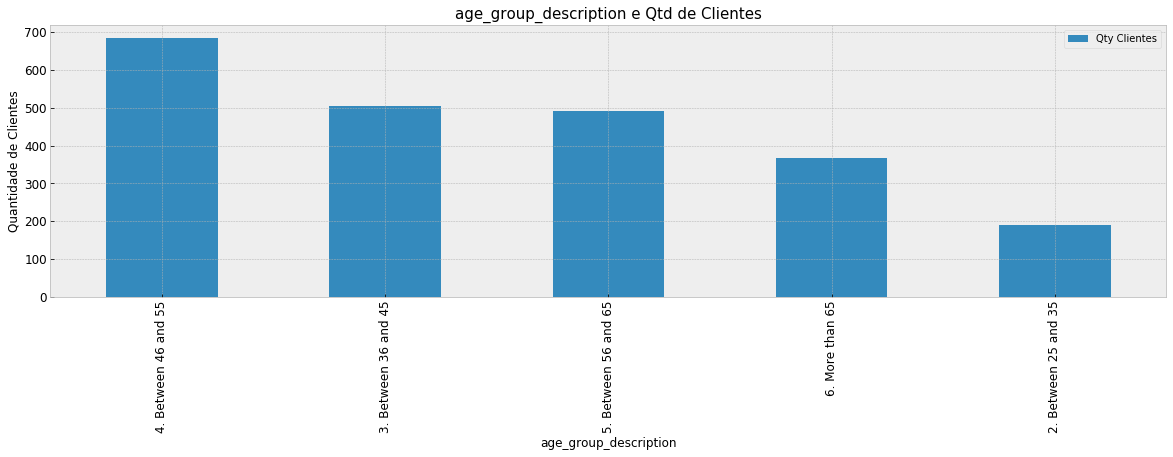

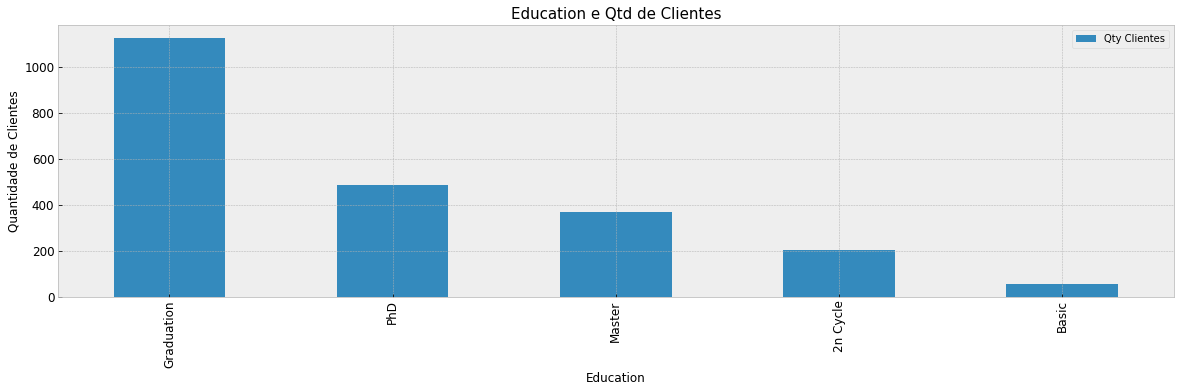

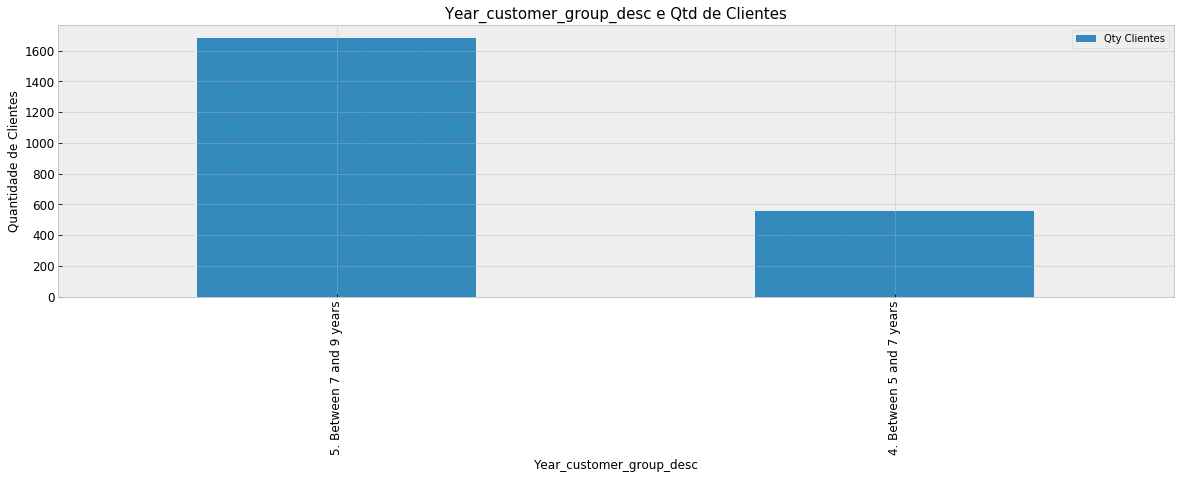

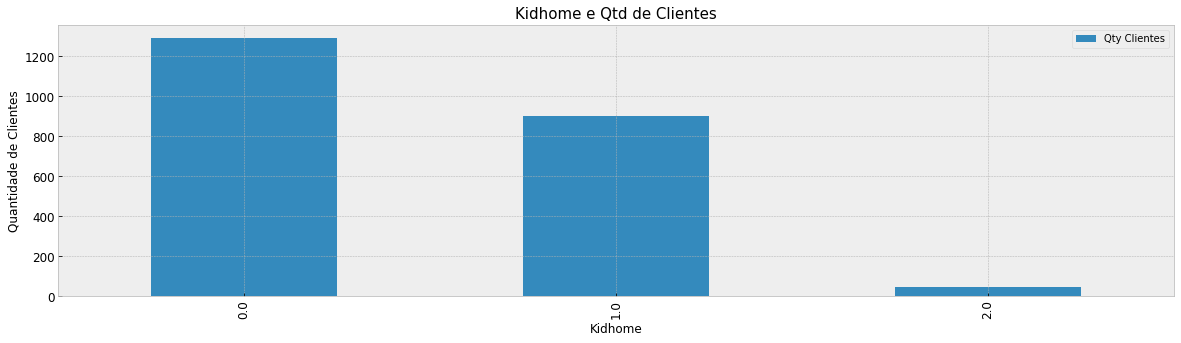

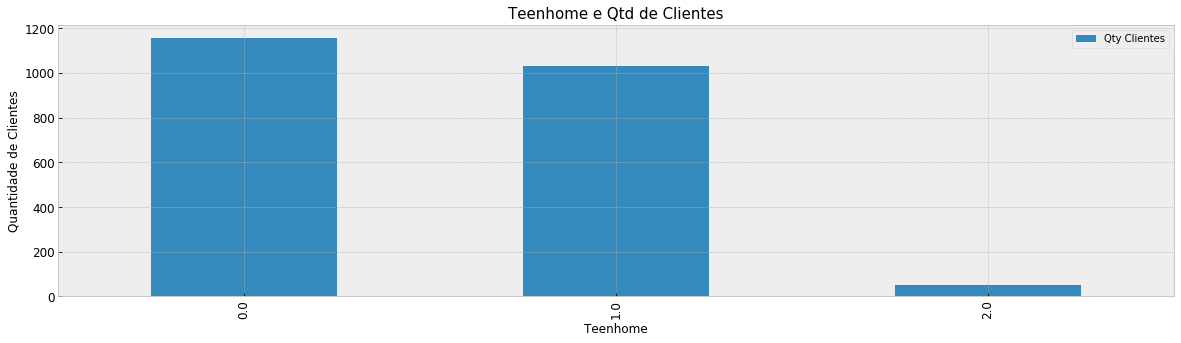

In [646]:
create_bar_graph(df_dataset_treated, "Marital_Status", "ID", "Qtd Clientes", "Marital_Status", "Quantidade de Clientes", "Marital_Status e Qtd de Clientes")

create_bar_graph(df_dataset_treated, "age_group_description", "ID", "Qty Clientes", "age_group_description", "Quantidade de Clientes", "age_group_description e Qtd de Clientes")

create_bar_graph(df_dataset_treated, "Education", "ID", "Qty Clientes", "Education", "Quantidade de Clientes", "Education e Qtd de Clientes")

create_bar_graph(df_dataset_treated, "Year_customer_group_desc", "ID", "Qty Clientes", "Year_customer_group_desc", "Quantidade de Clientes", "Year_customer_group_desc e Qtd de Clientes")

create_bar_graph(df_dataset_treated, "Kidhome", "ID", "Qty Clientes", "Kidhome", "Quantidade de Clientes", "Kidhome e Qtd de Clientes")

create_bar_graph(df_dataset_treated, "Teenhome", "ID", "Qty Clientes", "Teenhome", "Quantidade de Clientes", "Teenhome e Qtd de Clientes")

### 5.2  Exploration of Income

In [647]:
def create_bar_graph(df, vargroupby, varcount, varreplace, xlabel, ylabel, title):
    
    df_produtos = df.groupby([vargroupby])[varcount].mean()
    df_produtos = pd.DataFrame(df_produtos).rename(columns = {varcount:varreplace})
    
    # Create a bar graph with qty of readers by book
    # Define the size
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [20,5]
    plt.rcParams['font.size'] = 10
    #plt.figure(figsize=(10,5), dpi=100)
    #figsize=(40,5)
    df_produtos.sort_values([varreplace], ascending=False).plot(kind="bar", fontsize=12, legend=True, label=df_produtos[varreplace].tolist())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, fontsize=15)
    plt.show()

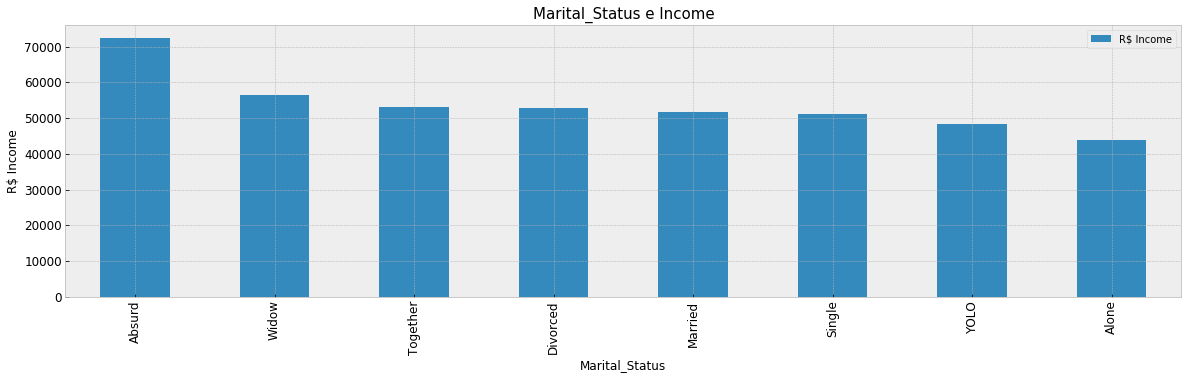

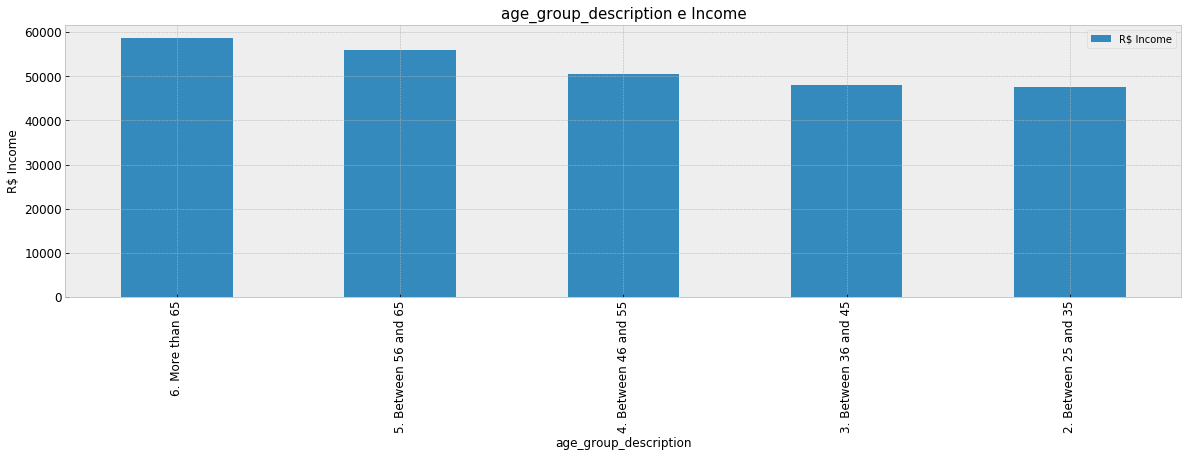

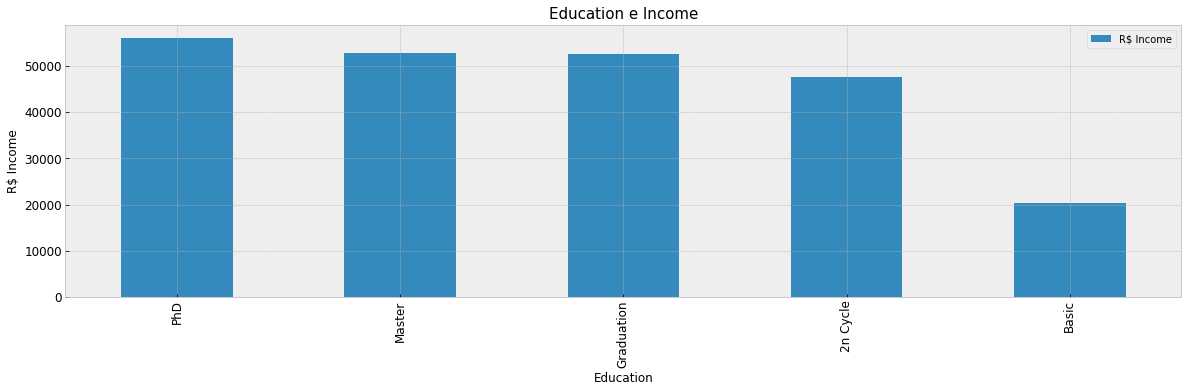

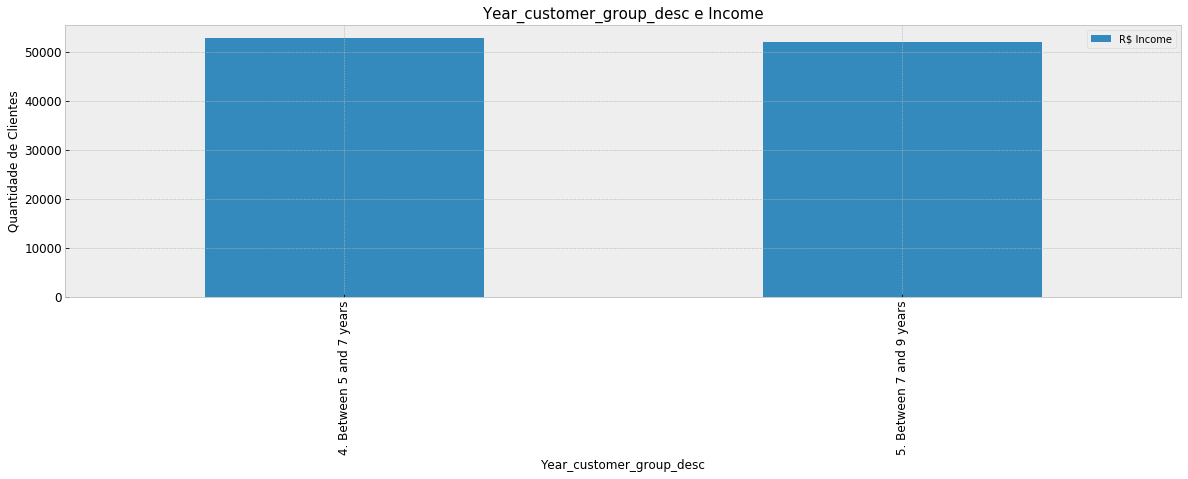

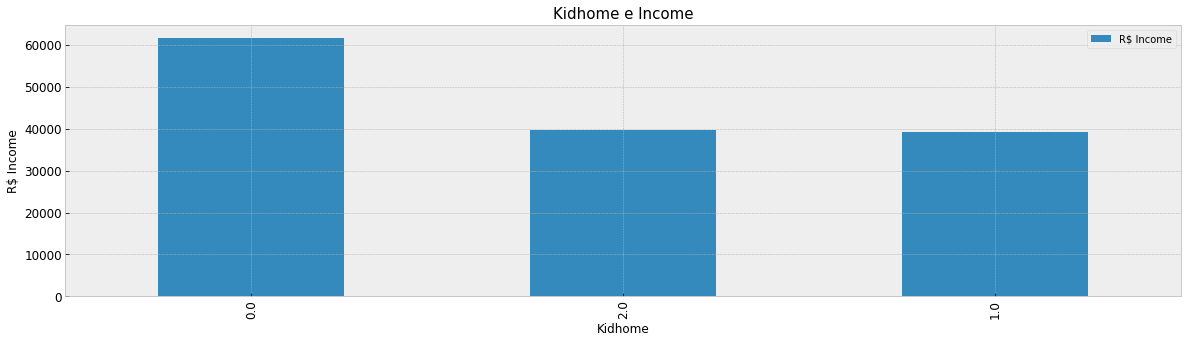

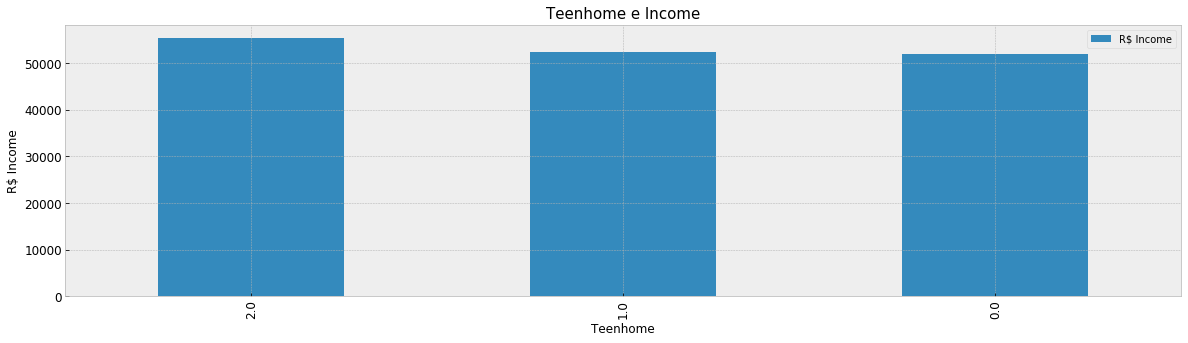

In [648]:
create_bar_graph(df_dataset_treated, "Marital_Status", "Income", "R$ Income", "Marital_Status", "R$ Income", "Marital_Status e Income")

create_bar_graph(df_dataset_treated, "age_group_description", "Income", "R$ Income", "age_group_description", "R$ Income", "age_group_description e Income")

create_bar_graph(df_dataset_treated, "Education", "Income", "R$ Income", "Education", "R$ Income", "Education e Income")

create_bar_graph(df_dataset_treated, "Year_customer_group_desc", "Income", "R$ Income", "Year_customer_group_desc", "Quantidade de Clientes", "Year_customer_group_desc e Income")

create_bar_graph(df_dataset_treated, "Kidhome", "Income", "R$ Income", "Kidhome", "R$ Income", "Kidhome e Income")

create_bar_graph(df_dataset_treated, "Teenhome", "Income", "R$ Income", "Teenhome", "R$ Income", "Teenhome e Income")

In [649]:
df_dataset_treated.groupby(["Teenhome"])["Income"].mean()

Teenhome
0.0    51891.744184
1.0    52482.976715
2.0    55494.947141
Name: Income, dtype: float64

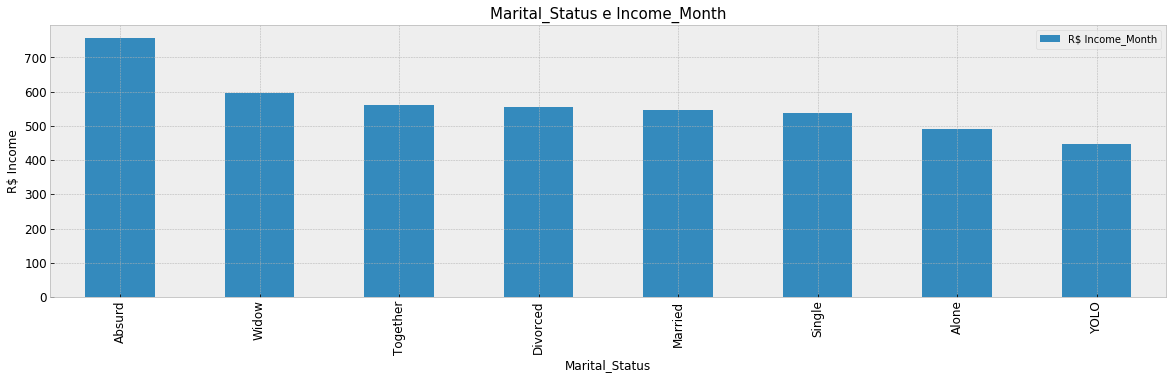

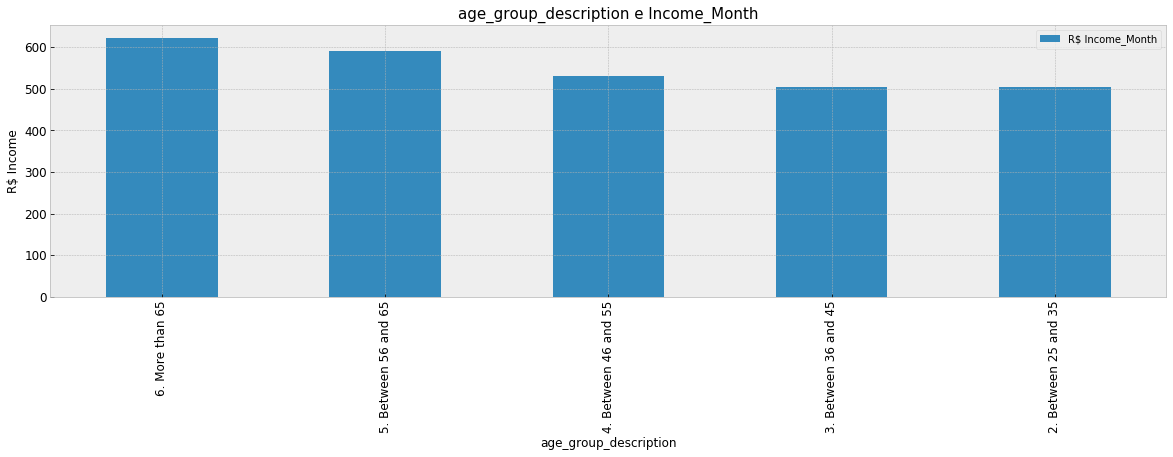

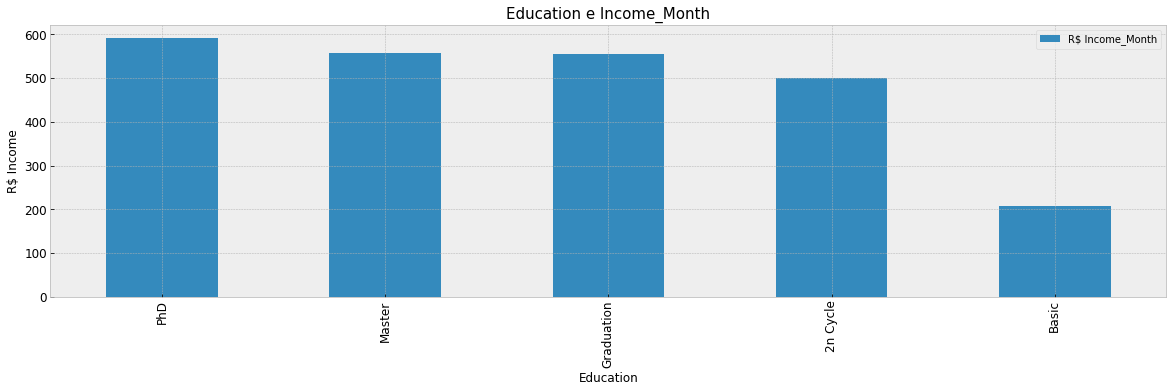

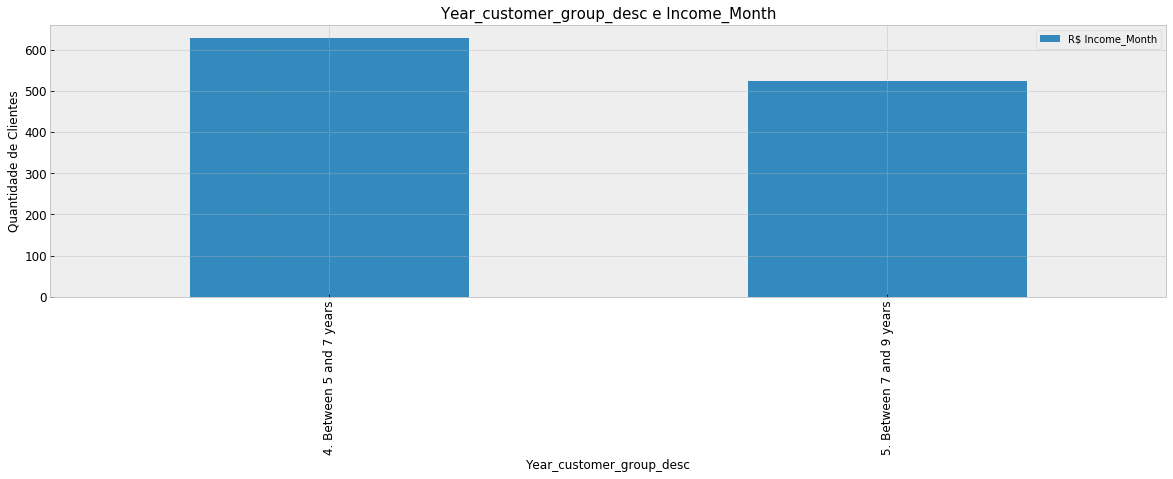

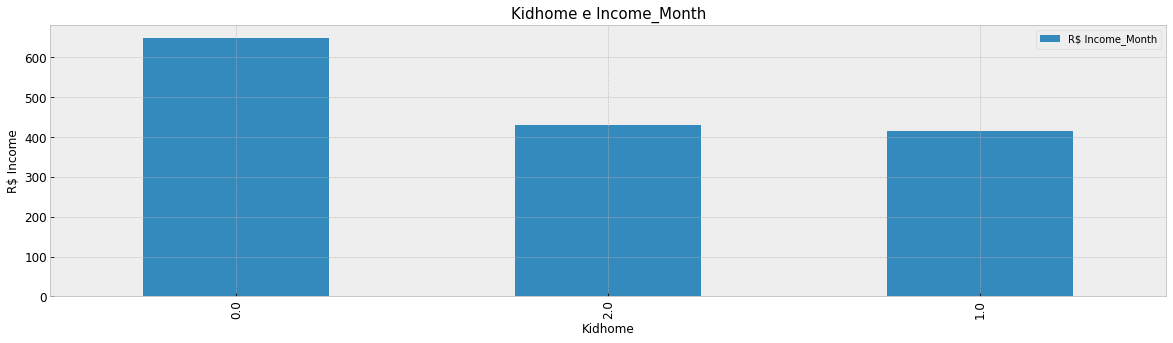

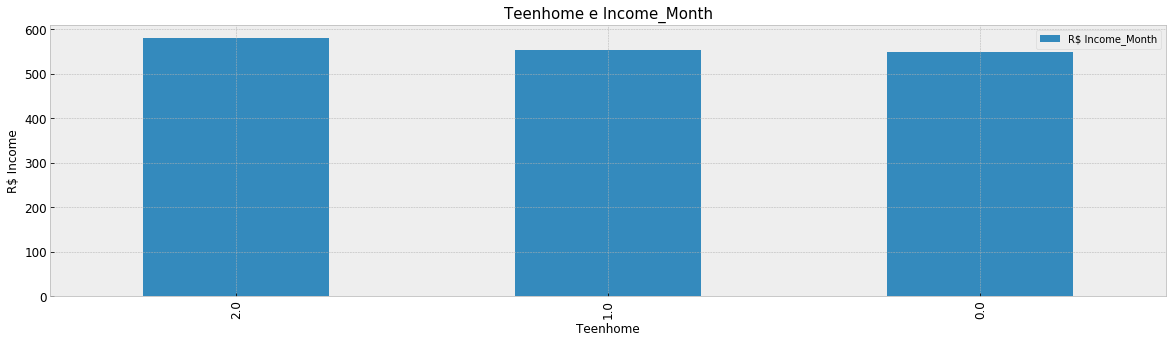

In [650]:
create_bar_graph(df_dataset_treated, "Marital_Status", "Income_Month", "R$ Income_Month", "Marital_Status", "R$ Income", "Marital_Status e Income_Month")

create_bar_graph(df_dataset_treated, "age_group_description", "Income_Month", "R$ Income_Month", "age_group_description", "R$ Income", "age_group_description e Income_Month")

create_bar_graph(df_dataset_treated, "Education", "Income_Month", "R$ Income_Month", "Education", "R$ Income", "Education e Income_Month")

create_bar_graph(df_dataset_treated, "Year_customer_group_desc", "Income_Month", "R$ Income_Month", "Year_customer_group_desc", "Quantidade de Clientes", "Year_customer_group_desc e Income_Month")

create_bar_graph(df_dataset_treated, "Kidhome", "Income_Month", "R$ Income_Month", "Kidhome", "R$ Income", "Kidhome e Income_Month")

create_bar_graph(df_dataset_treated, "Teenhome", "Income_Month", "R$ Income_Month", "Teenhome", "R$ Income", "Teenhome e Income_Month")

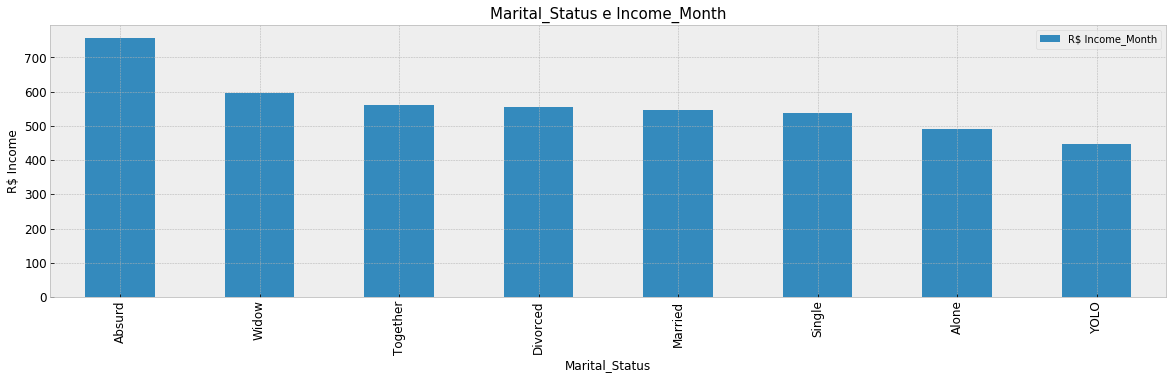

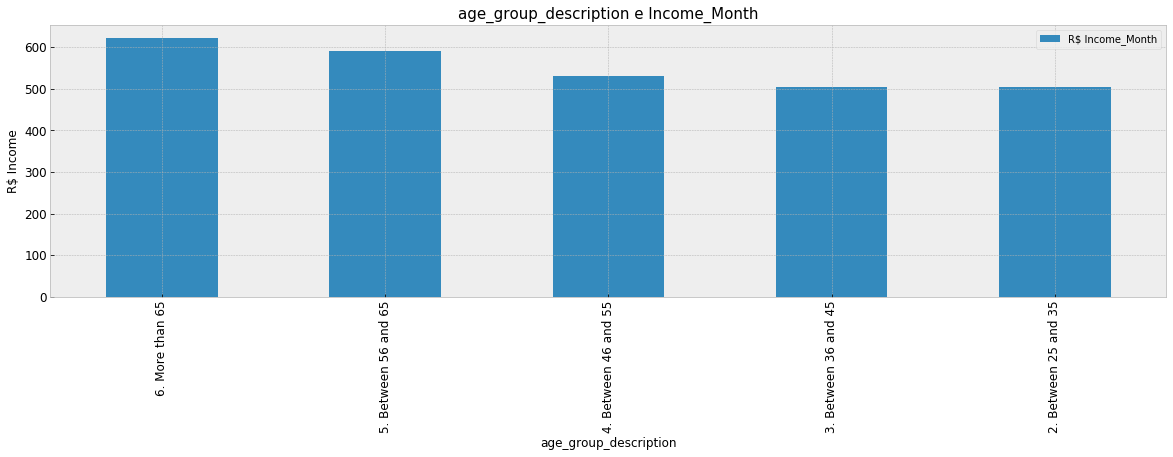

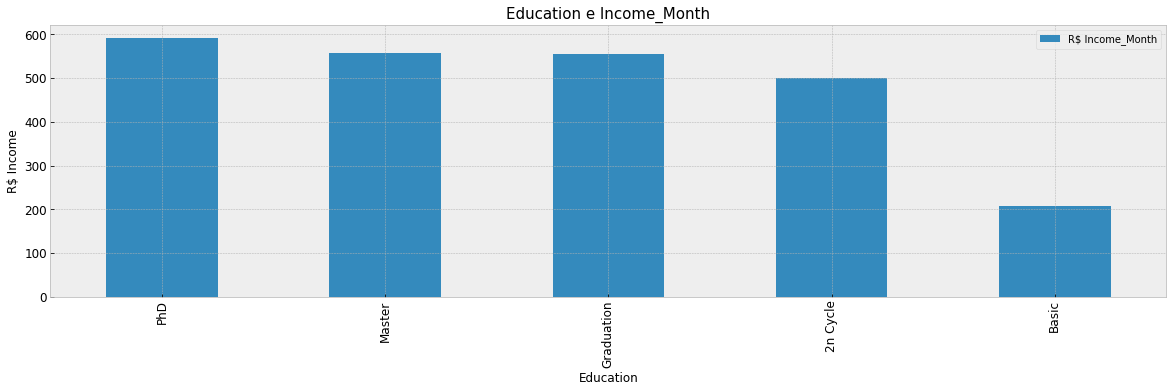

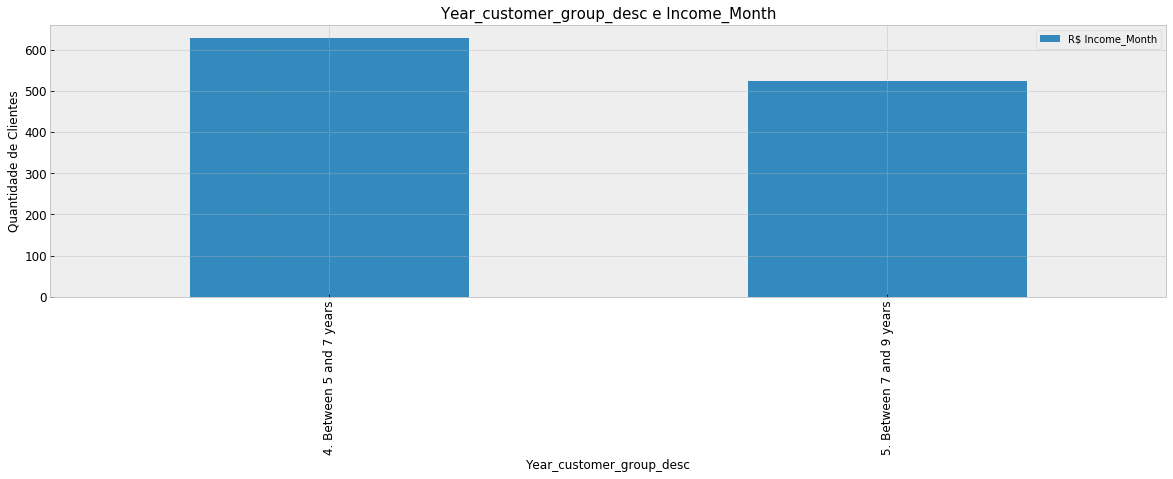

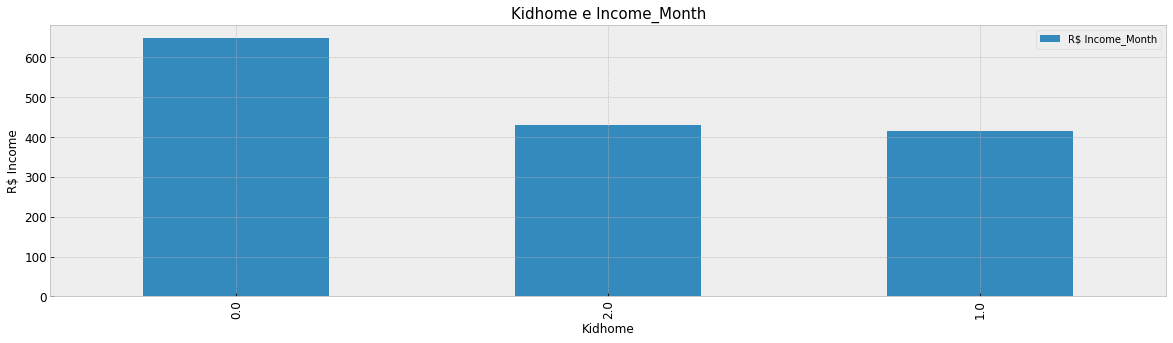

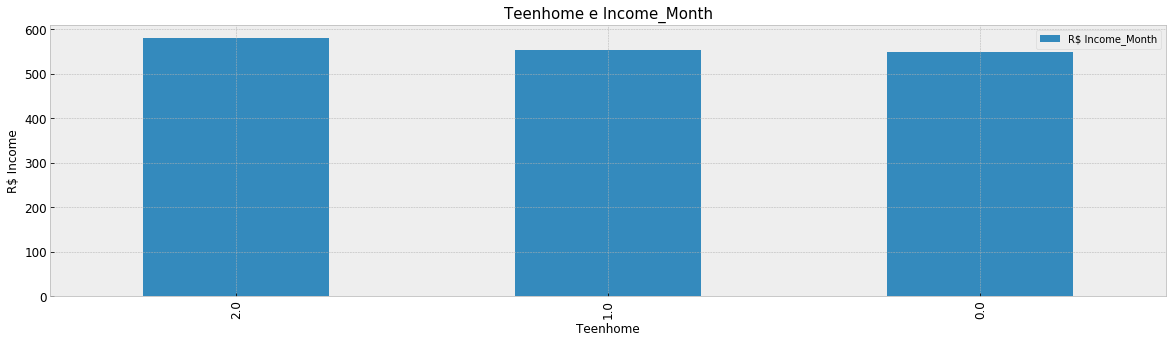

In [651]:
create_bar_graph(df_dataset_treated, "Marital_Status", "Income_Month", "R$ Income_Month", "Marital_Status", "R$ Income", "Marital_Status e Income_Month")

create_bar_graph(df_dataset_treated, "age_group_description", "Income_Month", "R$ Income_Month", "age_group_description", "R$ Income", "age_group_description e Income_Month")

create_bar_graph(df_dataset_treated, "Education", "Income_Month", "R$ Income_Month", "Education", "R$ Income", "Education e Income_Month")

create_bar_graph(df_dataset_treated, "Year_customer_group_desc", "Income_Month", "R$ Income_Month", "Year_customer_group_desc", "Quantidade de Clientes", "Year_customer_group_desc e Income_Month")

create_bar_graph(df_dataset_treated, "Kidhome", "Income_Month", "R$ Income_Month", "Kidhome", "R$ Income", "Kidhome e Income_Month")

create_bar_graph(df_dataset_treated, "Teenhome", "Income_Month", "R$ Income_Month", "Teenhome", "R$ Income", "Teenhome e Income_Month")

In [653]:
df_customers = df_dataset_treated.groupby(["Response", "age_group_description", "Kidhome"])["Income_Month", "MntWines", "MntFruits", "MntMeatProducts", "MntSweetProducts", "MntGoldProds"].mean()
df_customers = pd.DataFrame(df_customers).rename(columns = {'Income_Month':'Income_Month'})
display(df_customers)

/home/carol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


0                                       Income_Month    MntWines  MntFruits  \
Response age_group_description Kidhome                                        
0.0      2. Between 25 and 35  0.0        586.109478  364.962025  44.278481   
                               1.0        339.636262   69.168831  12.662338   
                               2.0        202.968750    6.000000   0.000000   
         3. Between 36 and 45  0.0        636.222776  377.200000  45.462500   
                               1.0        404.544737   70.179389   8.125954   
                               2.0        472.264668   96.428571  27.428571   
         4. Between 46 and 55  0.0        635.829199  428.069343  34.021898   
                               1.0        430.061862  124.825175   8.860140   
                               2.0        374.413403   29.210526   3.052632   
         5. Between 56 and 65  0.0        620.782518  391.974441  36.533546   
                               1.0        466.137296  103.352381   6.666667   
                               2.0        421.761104   76.615385   4.307692   
         6. More than 65       0.0        656.278440  422.873469  31.400000   
                               1.0        458.746631  110.152542   4.796610   
                               2.0        613.374176  191.666667   1.333333   
1.0      2. Between 25 and 35  0.0        810.252677  668.807692  65.076923   
                               1.0        251.860229   26.833333   5.666667   
         3. Between 36 and 45  0.0        765.672690  743.190476  55.047619   
                               1.0        350.027252  135.000000   7.363636   
                               2.0        443.945106  104.000000   5.500000   
         4. Between 46 and 55  0.0        719.323963  621.018182  64.781818   
                               1.0        387.855279  136.431373  13.215686   
         5. Between 56 and 65  0.0        702.503750  670.500000  42.696429   
                               1.0        411.811111  252.600000   4.000000   
         6. More than 65       0.0        704.431855  704.488372  40.813953   
                               1.0        472.127105  283.866667   4.333333   

0                                       MntMeatProducts  MntGoldProds  
Response age_group_description Kidhome                                 
0.0      2. Between 25 and 35  0.0           296.101266     56.734177  
                               1.0            53.363636     27.688312  
                               2.0             4.000000      0.000000  
         3. Between 36 and 45  0.0           268.931250     63.562500  
                               1.0            43.866412     21.270992  
                               2.0            49.428571     19.285714  
         4. Between 46 and 55  0.0           212.456204     56.288321  
                               1.0            51.895105     20.667832  
                               2.0            25.052632     15.105263  
         5. Between 56 and 65  0.0           195.536741     54.897764  
                               1.0            40.628571     17.247619  
                               2.0            34.076923     12.769231  
         6. More than 65       0.0           210.281633     56.506122  
                               1.0            36.237288     15.610169  
                               2.0            30.166667      8.000000  
1.0      2. Between 25 and 35  0.0           538.846154     75.384615  
                               1.0            28.333333     37.500000  
         3. Between 36 and 45  0.0           440.000000     70.833333  
                               1.0            68.303030     38.878788  
                               2.0            87.000000    100.000000  
         4. Between 46 and 55  0.0           422.927273     73.945455  
                               1.0            66.509804     28.254902  
         5. Between 56 and 65  0.0           336.821429    

In [654]:
df_customers = df_dataset_treated.groupby(["Marital_Status"])["Income_Month", "MntWines", "MntMeatProducts", "MntSweetProducts", "MntGoldProds",  "MntFruits"].mean()
display(df_customers)

/home/carol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Income_Month,MntWines,MntMeatProducts,MntGoldProds,MntFruits
Marital_Status,,,,,
Absurd,756.673942,355.500000,312.500000,204.000000,84.500000
Alone,490.875496,184.666667,26.333333,27.000000,4.000000
Divorced,554.736088,324.844828,150.206897,46.288793,27.426724
Married,545.809605,299.480324,160.681713,42.822917,25.734954
Single,538.568521,288.331250,182.108333,43.729167,26.835417
Together,560.508490,306.825862,168.103448,42.994828,25.350000
Widow,595.666653,369.272727,189.285714,56.766234,33.090909
YOLO,448.444444,322.000000,50.000000,42.000000,3.000000


In [655]:
df_customers = df_dataset_treated.groupby(["Response", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"])["Income_Month", "MntWines", "MntFruits", "MntMeatProducts", "MntSweetProducts", "MntGoldProds"].mean()
df_customers = pd.DataFrame(df_customers).rename(columns = {'Income_Month':'Income_Month'})
display(df_customers)

/home/carol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


0                                                                          Income_Month  \
Response AcceptedCmp1 AcceptedCmp2 AcceptedCmp3 AcceptedCmp4 AcceptedCmp5                 
0.0      0            0            0            0            0               514.909977   
                                                             1               881.787651   
                                                1            0               643.208664   
                                                             1               864.504561   
                                   1            0            0               473.803525   
                                                             1               876.591146   
                      1            0            1            0               595.058102   
                                                             1               884.437500   
                                   1            0            0               547.797619   
         1            0            0            0            0               797.968313   
                                                             1               933.024235   
                                                1            0               734.494144   
                                                             1               898.922371   
                                   1            0            0               791.296296   
                                                             1               943.970238   
                      1            0            1            1               953.976190   
1.0      0            0            0            0            0               510.437537   
                                                             1               827.892635   
                                                1            0               547.756313   
                                                             1               802.386767   
                                   1            0            0               435.368861   
                                                             1               764.750000   
                      1            0            0            0               679.654762   
                                                1            0               524.153549   
                                                             1               715.500000   
                                   1            0            1               817.425595   
         1            0            0            0            0               784.203068   
                                                             1               861.217947   
                                                1            0               645.613288   
                                                             1               913.096021   
                                   1            0            0               875.348909   
                                                             1               868.815360   
                      1            0            1            0               573.895833   
                                                             1               932.429540   
                                   1            0            1               906.573413   

0                                                                             MntWines  \
Response AcceptedCmp1 AcceptedCmp2 AcceptedCmp3 AcceptedCmp4 AcceptedCmp5                
0.0      0            0            0            0            0              216.703250   
                                                             1              781.526316   
                                                1            0              558.643836   
                                                             1             1055.083333   
                                   1            0            0              271.351351   
  

In [656]:
df_customers = df_dataset_treated.groupby(["Response"])["Income_Month", "MntWines", "MntFruits", "MntMeatProducts", "MntSweetProducts", "MntGoldProds"].mean()
df_customers = pd.DataFrame(df_customers).rename(columns = {'Income_Month':'Income_Month'})
display(df_customers)

/home/carol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Income_Month,MntWines,MntFruits,MntMeatProducts,MntGoldProds
Response,,,,,
0.0,539.530602,269.104407,24.216684,144.624344,40.968520
1.0,614.640576,502.703593,38.203593,294.353293,61.446108


In [657]:
df_customers = df_dataset_treated.groupby(["Complain", "Response"])["Income_Month", "MntWines", "MntFruits", "MntMeatProducts", "MntSweetProducts", "MntGoldProds"].mean()
df_customers = pd.DataFrame(df_customers).rename(columns = {'Income_Month':'Income_Month'})
display(df_customers)


df_customers = df_dataset_treated.groupby(["Complain", "Response"])["Income_Month", "MntWines", "MntFruits", "MntMeatProducts", "MntSweetProducts", "MntGoldProds"].count()
df_customers = pd.DataFrame(df_customers).rename(columns = {'Income_Month':'Income_Month'})
display(df_customers)

/home/carol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


0                  Income_Month    MntWines  MntFruits  MntMeatProducts  \
Complain Response                                                         
0        0.0         540.281243  270.175847  24.197034       145.139831   
         1.0         615.715561  505.060423  38.444109       294.809668   
1        0.0         460.796783  156.722222  26.277778        90.555556   
         1.0         496.033951  242.666667  11.666667       244.000000   

0                  MntGoldProds  
Complain Response                
0        0.0          41.191208  
         1.0          61.217523  
1        0.0          17.611111  
         1.0          86.666667

/home/carol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


0                  Income_Month  MntWines  MntFruits  MntMeatProducts  \
Complain Response                                                       
0        0.0               1888      1888       1888             1888   
         1.0                331       331        331              331   
1        0.0                 18        18         18               18   
         1.0                  3         3          3                3   

0                  MntSweetProducts  MntGoldProds  
Complain Response                                  
0        0.0                   1888          1888  
         1.0                    331           331  
1        0.0                     18            18  
         1.0                      3             3

In [658]:
import pandas as pd
import numpy as np

corr = df_dataset_treated.corr()
corr.style.background_gradient()

/home/carol/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/home/carol/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/home/carol/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


0,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Current_Year,Year_customer,Age,years_as_customer,months_as_customer,Income_Month,marital_status_id,education_id
0,,,,,,,,,,,,,,,,,,,,,,,,
Year_Birth,1.000000,-0.160942,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.061818,-0.060846,-0.145040,-0.121275,-0.128272,0.121139,0.021325,nan,-0.028188,-1.000000,0.028188,0.028188,-0.161912,-0.195198,0.171390
Income,-0.160942,1.000000,-0.425176,0.019018,-0.003946,0.576789,0.428747,0.577802,0.437497,0.321978,-0.082290,0.380550,0.586725,0.526489,-0.549824,0.132756,nan,0.022366,0.160942,-0.022366,-0.022366,0.981499,0.041003,-0.119974
Kidhome,0.230176,-0.425176,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,-0.080008,nan,0.053339,-0.230176,-0.053339,-0.053339,-0.411173,-0.060718,0.045564
Teenhome,-0.352111,0.019018,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.154446,nan,-0.008260,0.352111,0.008260,0.008260,0.013933,0.103009,-0.118485
Recency,-0.019871,-0.003946,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.198437,nan,-0.026084,0.019871,0.026084,0.026084,-0.010387,-0.003160,0.011728
MntWines,-0.157773,0.576789,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.247254,nan,-0.154188,0.157773,0.154188,0.154188,0.534325,0.043110,-0.197576
MntFruits,-0.017917,0.428747,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.125289,nan,-0.055150,0.017917,0.055150,0.055150,0.412069,0.014887,0.080412
MntMeatProducts,-0.030872,0.577802,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.236335,nan,-0.082472,0.030872,0.082472,0.082472,0.550949,-0.017271,-0.033625
MntFishProducts,-0.041625,0.437497,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.111331,nan,-0.067611,0.041625,0.067611,0.067611,0.418546,0.026714,0.112223
